# Colouring from matplotlib colourmaps

This is a short example on using matplotlib colour maps (Full list of colour maps [here](https://matplotlib.org/examples/color/colormaps_reference.htm)).

To start we set up some fake data (a set of x values and a set of sine curves with different amplitudes):

In [20]:
# import numpy 
import numpy as np
# set up an x range
x = np.arange(0, 100)
# set up some amplitudes 
amps = np.arange(1, 10)
# storage for y data
y = []
# loop around amplitudes and calculate y
for amp in amps:
    y.append(amp * np.sin(2 * np.pi * x/(0.5 * len(x))))

Here is what the default colours would look like:

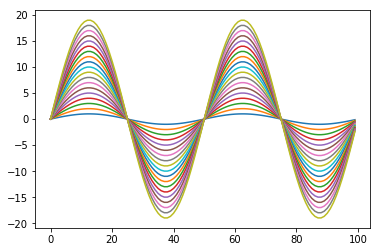

In [13]:
# notebook
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# set up plot
frame = plt.subplot(111)
# loop around our y values
for i in range(len(y)):
    # plot our graph
    frame.plot(x, y[i])

Now we set up the colour selection from a colour map:

In [21]:
# need to import a few more things
import matplotlib.colors as colors
import matplotlib.cm as cmx

# select a colour map
ourmap = plt.get_cmap('plasma')
# create a colour normalisation from our amplitudes
cNorm = colors.Normalize(vmin=np.min(amps), vmax=np.max(amps))
# map these colours onto our colour map
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=ourmap)


Now we plot out graph

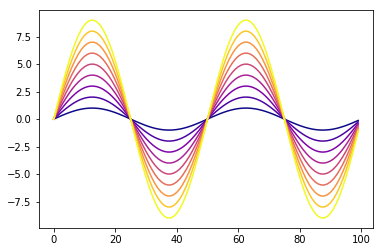

In [22]:

# set up plot
frame = plt.subplot(111)
# loop around our y values
for i in range(len(y)):
    # get our colour for this iteration
    colorVal = scalarMap.to_rgba(amps[i])
    # plot our graph
    frame.plot(x, y[i], color=colorVal)
    

With labels:

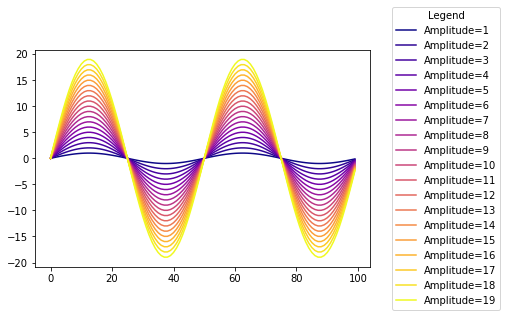

In [18]:
# set up plot
frame = plt.subplot(111)
# loop around our y values
for i in range(len(y)):
    # get our colour for this iteration
    colorVal = scalarMap.to_rgba(amps[i])
    # plot our graph
    frame.plot(x, y[i], color=colorVal,
               label='Amplitude={0}'.format(amps[i]))
legend = frame.legend(loc=6, bbox_to_anchor=[1.05, 0.5],
                      title='Legend')

And of course now we can add a colour bar to explain the colours (if required)

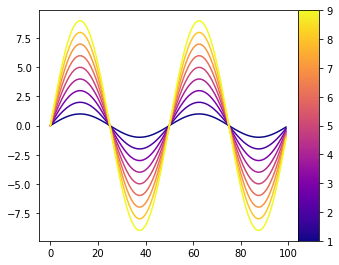

In [28]:
# need one more import
import matplotlib as mpl

# set up plot (adding set size frames with fig.add_axes)
fig = plt.figure()
frame = fig.add_axes([0.1,0.1,0.6,0.8])
cax = fig.add_axes([0.7, 0.1, 0.05, 0.8])
# loop around our y values
for i in range(len(y)):
    # get our colour for this iteration
    colorVal = scalarMap.to_rgba(amps[i])
    # plot our graph
    frame.plot(x, y[i], color=colorVal)
# colorbar
cb = mpl.colorbar.ColorbarBase(ax=cax, cmap=ourmap, norm=cNorm)

### Sources:

- [Colour maps](https://matplotlib.org/examples/color/colormaps_reference.html)

- [Using colormaps to set color of line in matplotlib](https://stackoverflow.com/questions/8931268/using-colormaps-to-set-color-of-line-in-matplotlib)

- [Colorbar from scalar mappable](https://matplotlib.org/examples/api/colorbar_only.html)

- [Advanced plotting](https://python4astronomers.github.io/plotting/advanced.html)